In [1]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


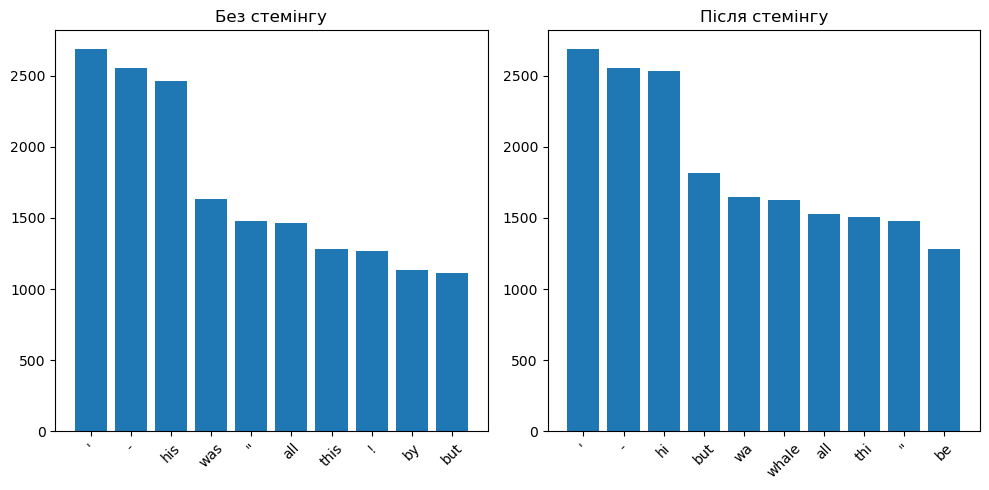

In [14]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.book import *

stopwords = {"the", ",", ".", "i", "to", "a", "of", "and", "in", "for", "on", "with", "it", "you", "is", "that", "at", "as","he",";","s"}

words_filtered = [word for word in text1 if word.lower() not in stopwords]

freq_orig = Counter(words_filtered)

stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in words_filtered]

freq_stemmed = Counter(stems)

top_orig = freq_orig.most_common(10)
top_stemmed = freq_stemmed.most_common(10)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(*zip(*top_orig))
plt.title("Без стемінгу")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(*zip(*top_stemmed))
plt.title("Після стемінгу")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [18]:
import re
from nltk.stem import RegexpStemmer

st = RegexpStemmer('ами$|ями$|ові$|еві$|єві$|ую$|єте$|ете$|ати$|яти$|ити$|іти$|учи$|ючи$|шся$|ться$|сь$|ий$|ій$|а$|я$|е$|є$|у$|ю$|и$|і$|о$')
st.stem("проектуючи")

def ukrainian_stem(word):
    return re.sub(r"(ів|івка|ями|ами|ость|іст|ці|ою|ий|ого|ому|ім|ах|ами|ях|ем|ев|єв|ів|ом|ої|ею|єю)$", "", word.lower())

text = "Ось прозовий текст історії українською:У далекому селі, яке було загублене серед лісів, жила молода дівчина на ім’я Марічка. Вона була відома у своєму селі завдяки своїй доброті і чуйності. Кожен, хто приходив до неї, завжди залишався з посмішкою на обличчі. Марічка допомагала всім: від старих людей, яким вона приносила ліки, до малих дітей, яких навчала читати і писати.Одна з її найбільших мрій була відвідати велике місто, де вона чула, що всі можуть знайти своє щастя. Та її життя в селі завжди потребувало її присутності. Якось, у середині осені, коли на деревах вже жовтіли останні листя, вона вирушила в подорож, щоб подивитися на світ поза межами рідного дому."

words = text.split() 
stems = [ukrainian_stem(word) for word in words]

print(stems)



['ось', 'прозов', 'текст', 'історії', 'українською:у', 'далек', 'селі,', 'яке', 'було', 'загублене', 'серед', 'лісів,', 'жила', 'молода', 'дівчина', 'на', 'ім’я', 'марічка.', 'вона', 'була', 'відома', 'у', 'своєму', 'селі', 'завдяки', 'своїй', 'доброті', 'і', 'чуйності.', 'кожен,', 'хто', 'приходив', 'до', 'неї,', 'завжди', 'залишався', 'з', 'посмішк', 'на', 'обличчі.', 'марічка', 'допомагала', 'всім:', 'від', 'старих', 'людей,', 'яким', 'вона', 'приносила', 'ліки,', 'до', 'малих', 'дітей,', 'яких', 'навчала', 'читати', 'і', 'писати.одна', 'з', 'її', 'найбільших', 'мрій', 'була', 'відвідати', 'велике', 'місто,', 'де', 'вона', 'чула,', 'що', 'всі', 'можуть', 'знайти', 'своє', 'щастя.', 'та', 'її', 'життя', 'в', 'селі', 'завжди', 'потребувало', 'її', 'присутності.', 'якось,', 'у', 'середині', 'осені,', 'коли', 'на', 'дерев', 'вже', 'жовтіли', 'останні', 'листя,', 'вона', 'вирушила', 'в', 'подорож,', 'щоб', 'подивитися', 'на', 'світ', 'поза', 'меж', 'рідн', 'дому.']


In [1]:
import numpy as np

def qwerty_distance(char1, char2):
 
    qwerty_layout = {
        'qwertyuiop': 1, 'asdfghjkl': 2, 'zxcvbnm': 3
    }
    
    for row, weight in qwerty_layout.items():
        if char1 in row and char2 in row:
            return 0.5  
    
    return 1  

def damerau_levenshtein(q, r):
    len_q, len_r = len(q), len(r)
    D = np.zeros((len_q + 1, len_r + 1))
    
    for i in range(len_q + 1):
        D[i][0] = i
    for j in range(len_r + 1):
        D[0][j] = j
    
    for i in range(1, len_q + 1):
        for j in range(1, len_r + 1):
            cost = 0 if q[i-1] == r[j-1] else qwerty_distance(q[i-1], r[j-1])
            
            D[i][j] = min(
                D[i-1][j] + 1,  
                D[i][j-1] + 1, 
                D[i-1][j-1] + cost  
            )
            
            if i > 1 and j > 1 and q[i-1] == r[j-2] and q[i-2] == r[j-1]:
                D[i][j] = min(D[i][j], D[i-2][j-2] + cost)  
    return D[len_q, len_r]

word1 = "hello"
word2 = "hell no"
print(f"Wagner-Fischer distance between '{word1}' and '{word2}':", damerau_levenshtein(word1, word2))


Wagner-Fischer distance between 'hello' and 'hell no': 2.0
